**ISMAIL ABU SAIID**

**BIG DATA ANALYTICS**



---


# Analyzing The Interplay of Housing-Related Factors Across Varied Structure Types #

**Content:**
1. **Importing Libraries**
2. **Loading the Data**
3. **Data Preprocessing**
4. **EDA**
5. **Analysis & Visualization**



---


**DATA SCIENCE QUESTIONS:**
1. What is the distribution of housing structure types across the FMTMETRO3 areas?

2. How is the mix of homeowners and renters distributed among different types of housing structures?

3. What is the average housing cost for different structure types, and is there a correlation with the corresponding total average wage income?

4. What are the average room counts for various types of housing structures, and is there a connection between the average fair market rent (FMR) and the number of rooms?

5. What's the cost burden for different types of housing structures? Do certain types of structures tend to have higher cost burdens, and are they more likely to be under financial strain?

6. How do average household & additional costs vary for different housing structure types?

7. How does the distribution of assisted housing compare between different structure types? Are specific structure types more likely to receive assistance?

8. How does the difference in Cost relative to Median Income vary among the different housing structure types?

9. How is the distribution of structure types changing over the years in terms of construction?



---




1. **Importing Libraries**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.4/spark-3.3.4-bin-hadoop3.tgz

In [ ]:
!tar xf spark-3.3.4-bin-hadoop3.tgz

In [ ]:
import os
os.environ["JAVA_HOME"]= "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]= "/content/spark-3.3.4-bin-hadoop3"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.4-bin-hadoop3'

In [ ]:
from pyspark.sql.functions import col

**2. Loading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Housing Affordability Data System').getOrCreate()
data = spark.read.csv('/content/drive/My Drive/housdata.csv', header=True, inferSchema=True)

# Selecting data for our EDA and Analysis
data = data.select("CONTROL", "FMTSTRUCTURETYPE", "REGION", "FMTMETRO3", "FMTOWNRENT", "COSTMED", "TOTSAL", "ROOMS", "FMR", "FMTBURDEN", "FMTASSISTED", "BUILT", "ZSMHC", "OTHERCOST", "FMTCOSTMEDRELAMICAT")
data.show(20)

+--------------+-----------------+------+--------------+----------+-----------+------+-----+----+-----------------+----------------+-----+-----+-----------+-------------------+
|       CONTROL| FMTSTRUCTURETYPE|REGION|     FMTMETRO3|FMTOWNRENT|    COSTMED|TOTSAL|ROOMS| FMR|        FMTBURDEN|     FMTASSISTED|BUILT|ZSMHC|  OTHERCOST|FMTCOSTMEDRELAMICAT|
+--------------+-----------------+------+--------------+----------+-----------+------+-----+----+-----------------+----------------+-----+-----+-----------+-------------------+
|'100003130103'|'1 Single Family'|   '1'|          '-5'| '1 Owner'|867.8586601|     0|    6|1095|'1 Less than 30%'|             '.'| 2006|  594|      310.0|   '2 30 - 50% AMI'|
|'100003130203'|'1 Single Family'|   '1'|          '-5'| '1 Owner'|2142.740555|     0|    5|1095|'1 Less than 30%'|             '.'| 2006|  684|     222.75| '6 100 - 120% AMI'|
|'100006370140'|'1 Single Family'|   '3'|          '-5'| '1 Owner'| 1592.93464| 58932|    6| 965|'1 Less than 30%'|

**3. Data Preprocessing**

- Checking for Null Values

In [ ]:
from pyspark.sql.functions import col, sum, asc

# Count total null values for each column in all dataset
data_null = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# Printing null values
print("No Null Values")
data_null.show()

No Null Values
+-------+----------------+------+---------+----------+-------+------+-----+---+---------+-----------+-----+-----+---------+-------------------+
|CONTROL|FMTSTRUCTURETYPE|REGION|FMTMETRO3|FMTOWNRENT|COSTMED|TOTSAL|ROOMS|FMR|FMTBURDEN|FMTASSISTED|BUILT|ZSMHC|OTHERCOST|FMTCOSTMEDRELAMICAT|
+-------+----------------+------+---------+----------+-------+------+-----+---+---------+-----------+-----+-----+---------+-------------------+
|      0|               0|     0|        0|         0|      0|     0|    0|  0|        0|          0|    0|    0|        0|                  0|
+-------+----------------+------+---------+----------+-------+------+-----+---+---------+-----------+-----+-----+---------+-------------------+



- Checking for Duplicate Values

In [ ]:
# Dropping duplicates for the dataset
data_duplicate = data.groupBy(data.columns).count().filter(col('count') > 1).count()
# Print the number of duplicated rows
print("There were {} duplicated rows in the data, no rows needed to be dropped".format(data_duplicate))

There were 0 duplicated rows in the data, no rows needed to be dropped


**4. EDA**

Most common Housing Structure Types

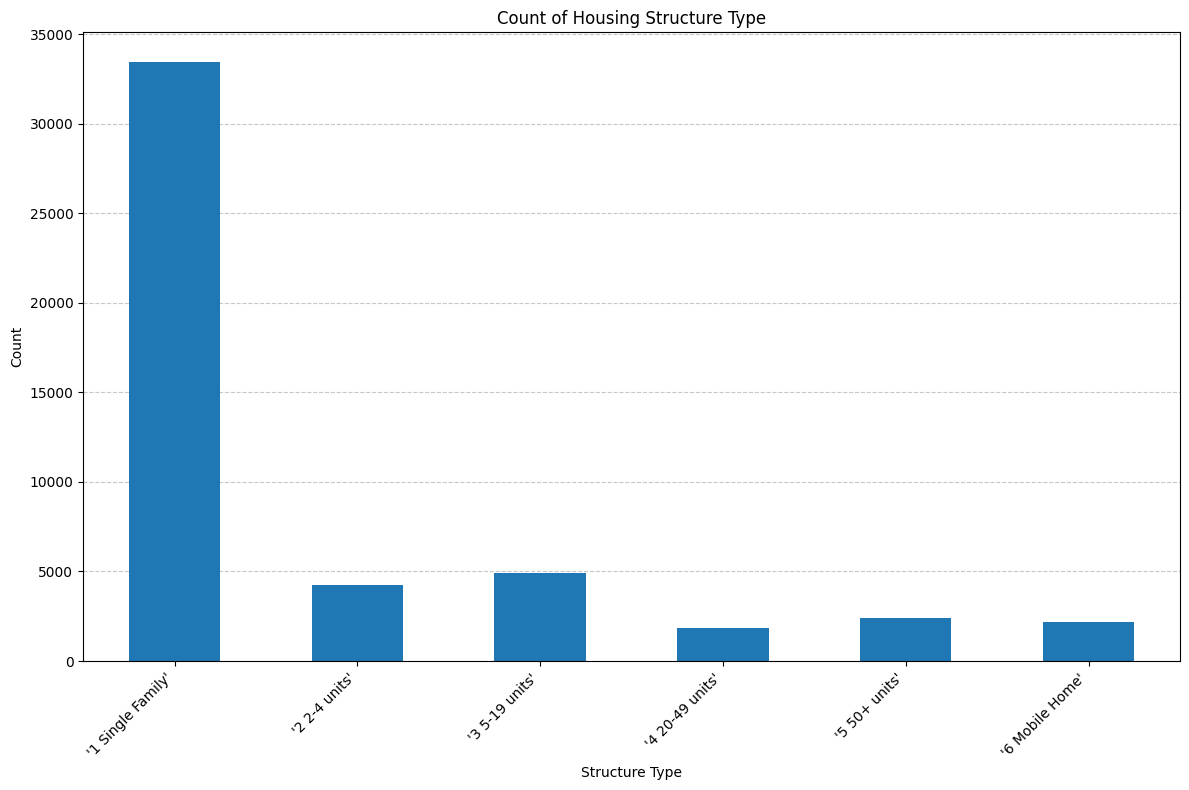

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Removing Incomprehensible values
eda_1 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Group by the 'FMTSTRUCTURETYPE' column and count the occurrences
structure_type_counts = eda_1.groupBy("FMTSTRUCTURETYPE").count().orderBy(asc('FMTSTRUCTURETYPE'))

# Convert to Pandas and plot
structure_type_counts_pandas = structure_type_counts.toPandas()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Plot the bar plot
structure_type_counts_pandas.plot(kind='bar', x='FMTSTRUCTURETYPE', y='count', legend=False, ax=ax)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.title("Count of Housing Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plt.savefig("eda1.png")
plt.show()

Distribution of the housing structure types across the four different regions


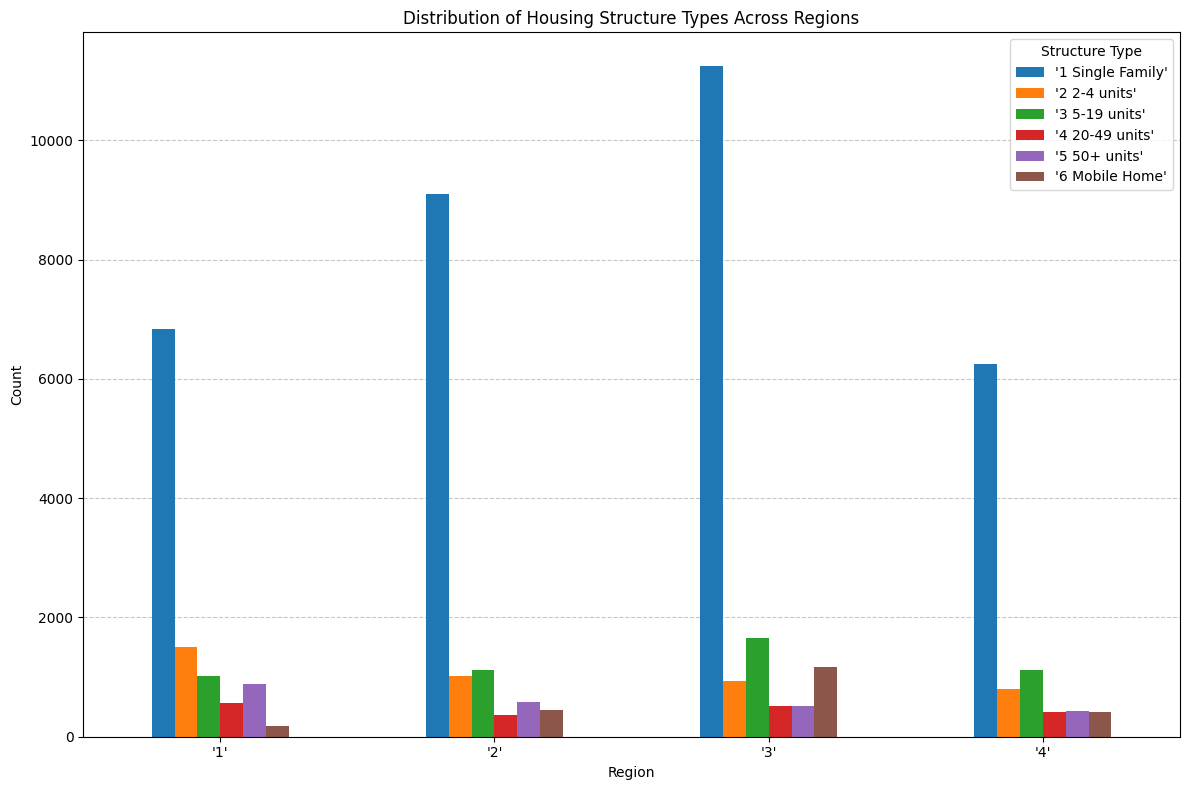

In [ ]:
# Removing Incomprehensible values
eda_2 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Groupby
structure_type_by_region_counts = eda_2.groupBy("REGION", "FMTSTRUCTURETYPE").count()

# Convert to Pandas for plotting
structure_type_by_region_pandas = structure_type_by_region_counts.toPandas()

# Pivot the data to have 'REGION' as the index and 'FMTSTRUCTURETYPE' as columns
structure_type_by_region_pivot = structure_type_by_region_pandas.pivot(index='REGION', columns='FMTSTRUCTURETYPE', values='count')

# Plot the grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))
structure_type_by_region_pivot.plot(kind='bar', stacked=False, ax=ax)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("Distribution of Housing Structure Types Across Regions")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Structure Type", loc='upper right')
plt.tight_layout()

#plt.savefig("eda2.png")
plt.show()

**5. Analysis (Data Science Questions)**

**What is the distribution of housing structure types across the FMTMETRO3 areas?**

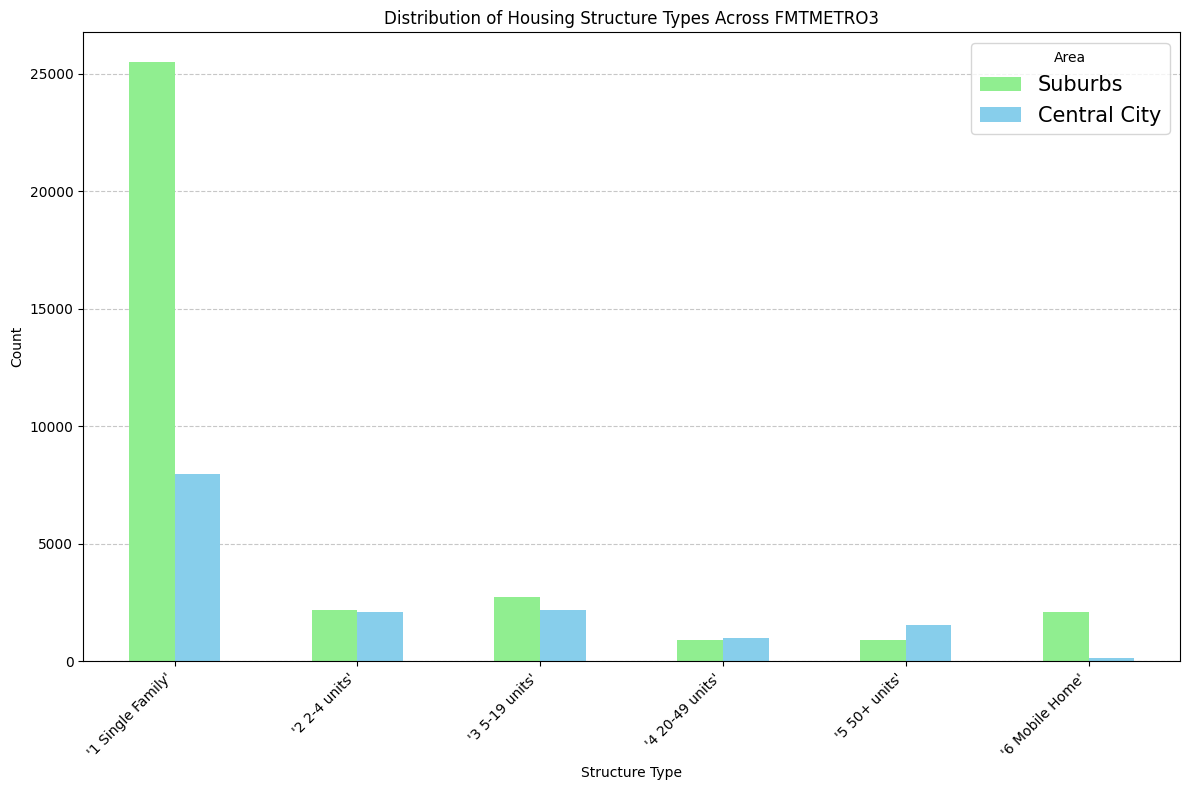

In [ ]:
# Removing Incomprehensible values
q1 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Group by the 'FMTMETRO3' and 'FMTSTRUCTURETYPE' columns and count the occurrences
structure_type_by_place_counts = q1.groupBy("FMTMETRO3", "FMTSTRUCTURETYPE").count()

# Convert to Pandas for plotting
structure_type_by_place_pandas = structure_type_by_place_counts.toPandas()

# Pivot the data to have 'FMTMETRO3' as the index and 'FMTSTRUCTURETYPE' as columns
structure_type_by_place_pivot = structure_type_by_place_pandas.pivot(index='FMTSTRUCTURETYPE', columns='FMTMETRO3', values='count')

# Plot the grouped bar plot
ax = structure_type_by_place_pivot.plot(kind='bar', color=['lightgreen', 'skyblue'], figsize=(12, 8), stacked= False)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("Distribution of Housing Structure Types Across FMTMETRO3")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
ax.legend(["Suburbs", "Central City"], title="Area", loc='upper right', fontsize = 15)
plt.tight_layout()

#plt.savefig("q1.png")
plt.show()

**How is the mix of homeowners and renters distributed among different types of housing structures?**

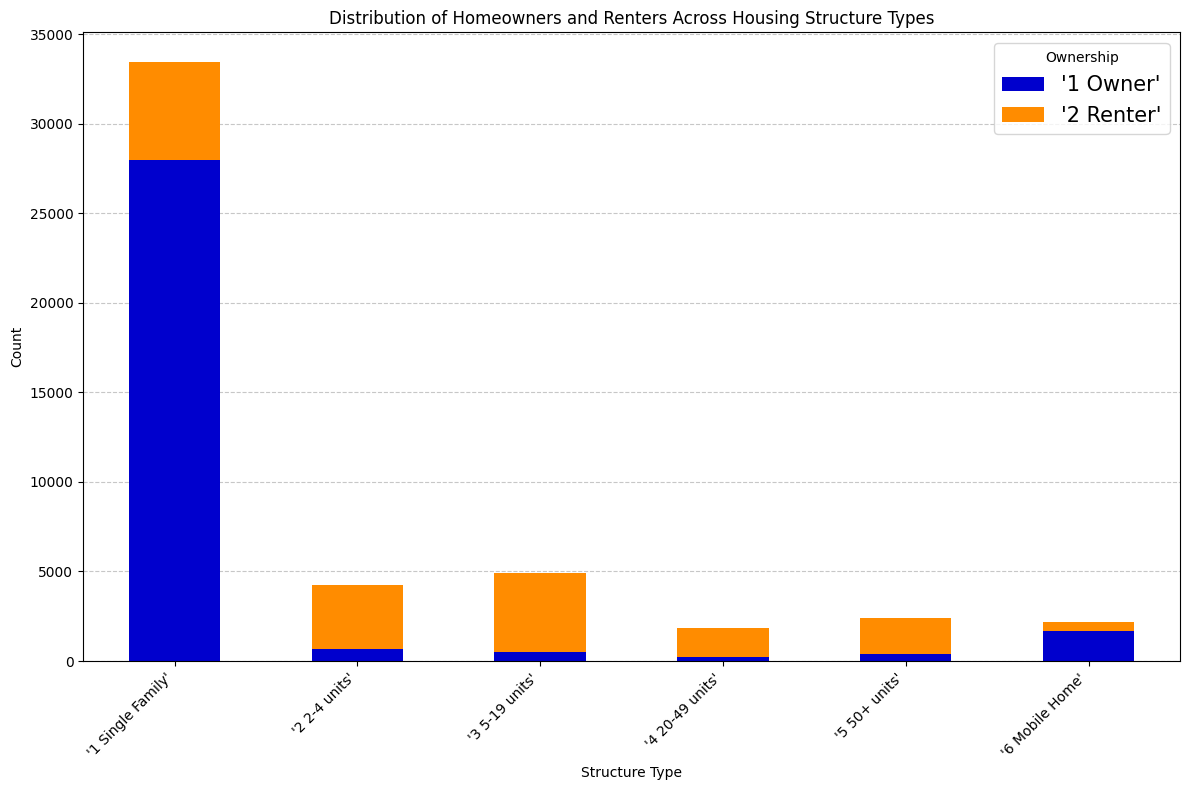

In [ ]:
# Removing Incomprehensible values
q2 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Group by the 'FMTSTRUCTURETYPE' and 'FMTOWNRENT' columns and count the occurrences
ownership_distribution_counts = q2.groupBy("FMTSTRUCTURETYPE", "FMTOWNRENT").count()

# Convert to Pandas for plotting
ownership_distribution_pandas = ownership_distribution_counts.toPandas()

# Pivot the data to have 'FMTSTRUCTURETYPE' as the index and 'FMTOWNRENT' as columns
ownership_distribution_pivot = ownership_distribution_pandas.pivot(index='FMTSTRUCTURETYPE', columns='FMTOWNRENT', values='count')

# Plot the stacked bar plot
ax = ownership_distribution_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['mediumblue', 'darkorange'])
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("Distribution of Homeowners and Renters Across Housing Structure Types")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ownership", loc='upper right', fontsize = 15)

# Show the plot
plt.tight_layout()
#plt.savefig("q2.png")
plt.show()

**What is the average housing cost for different structure types, and is there a correlation with the corresponding total average wage income?**

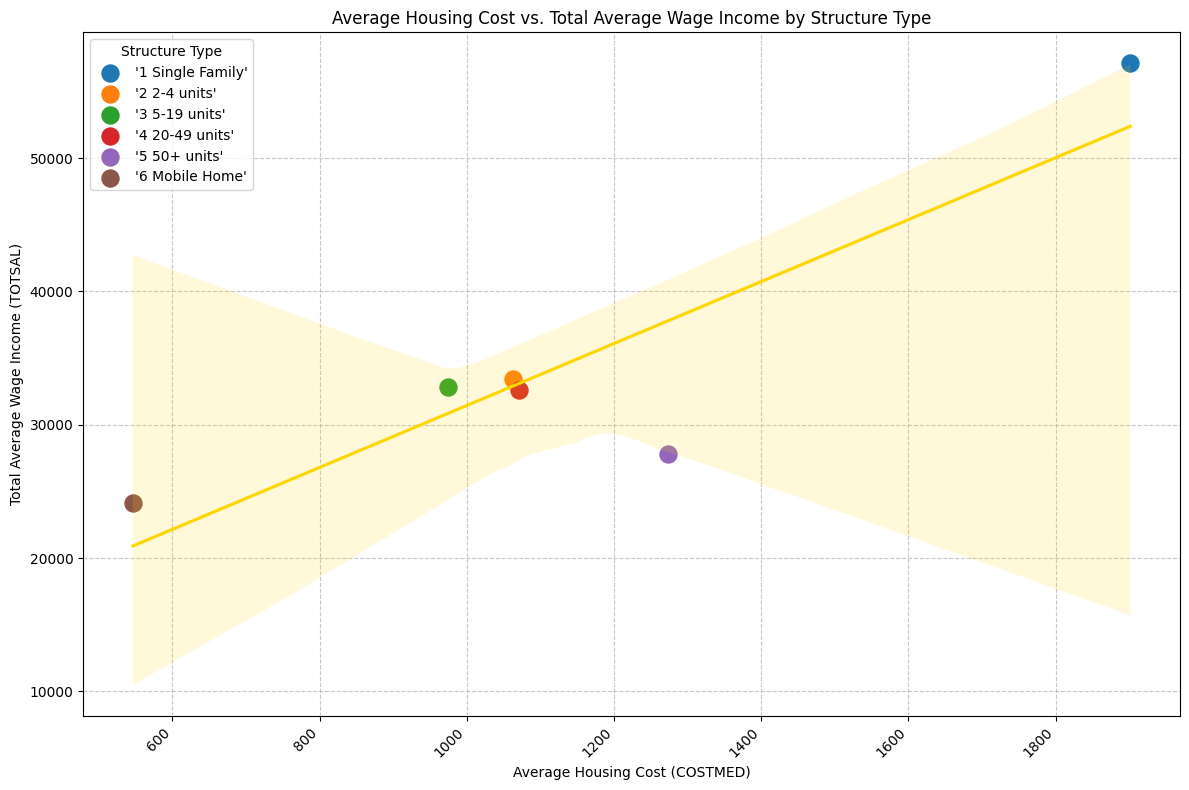

In [ ]:
import seaborn as sns

# Removing Incomprehensible values
q3 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))
q3 = q3.filter(~col('TOTSAL').contains(-9))

# Ensure the column names are case-sensitive
q3 = q3.selectExpr("FMTSTRUCTURETYPE", "COSTMED", "TOTSAL")

# Group by 'FMTSTRUCTURETYPE' and calculate the average housing cost and total average wage income
avg_costs_incomes = q3.groupBy("FMTSTRUCTURETYPE").agg({'COSTMED': 'mean', 'TOTSAL': 'mean'}).orderBy(asc('FMTSTRUCTURETYPE'))

# Convert to Pandas for plotting
avg_costs_incomes_pandas = avg_costs_incomes.toPandas()

# Plot separate scatter plots for each structure type
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

for structure_type in avg_costs_incomes_pandas['FMTSTRUCTURETYPE'].unique():
    subset = avg_costs_incomes_pandas[avg_costs_incomes_pandas['FMTSTRUCTURETYPE'] == structure_type]
    ax.scatter(subset['avg(COSTMED)'], subset['avg(TOTSAL)'], label=structure_type, s=150)

# Add a line of best fit
sns.regplot(x='avg(COSTMED)', y='avg(TOTSAL)', data=avg_costs_incomes_pandas, scatter=False, ax=ax, color='gold')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("Average Housing Cost vs. Total Average Wage Income by Structure Type")
plt.xlabel("Average Housing Cost (COSTMED)")
plt.ylabel("Total Average Wage Income (TOTSAL)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Structure Type", loc='upper left')
plt.tight_layout()

#plt.savefig("q3.png")
plt.show()

**What are the average room counts for various types of housing structures, and is there a connection between the average fair market rent (FMR) and the number of rooms?**

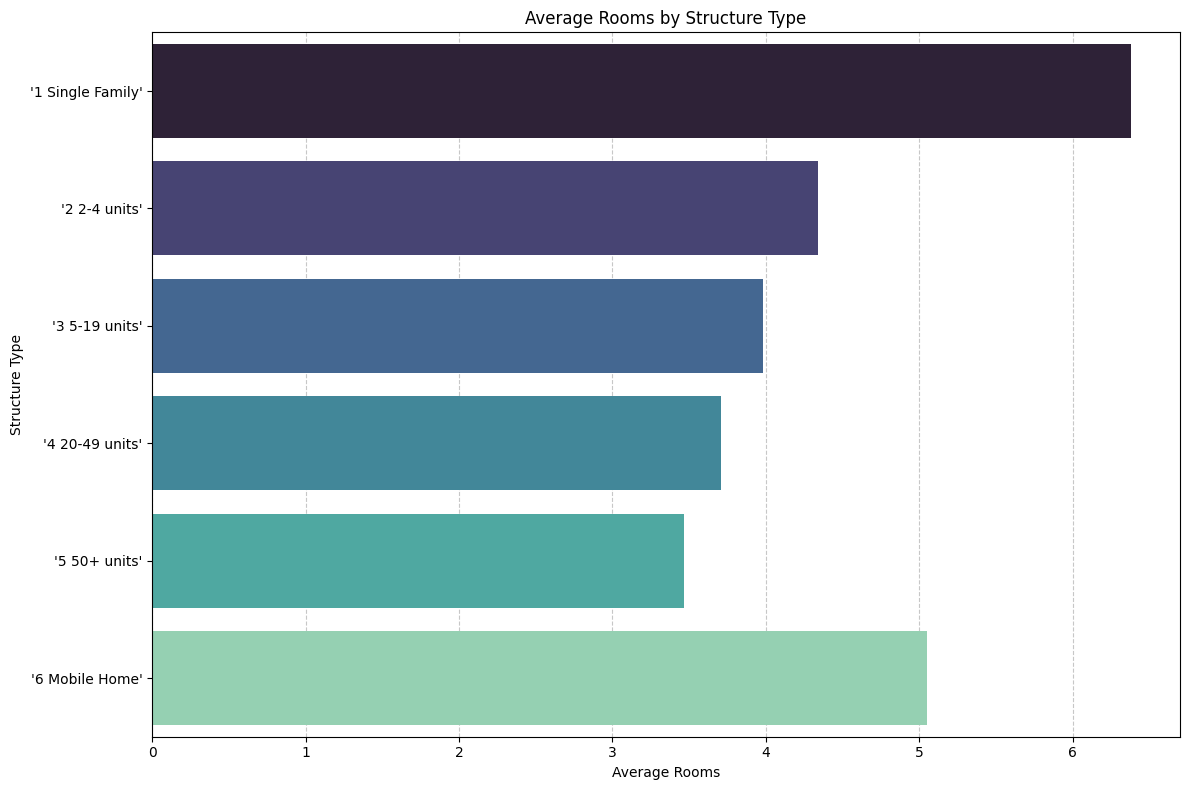

In [ ]:
# Removing Incomprehensible values
q4 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Group by 'FMTSTRUCTURETYPE' and calculate the average number of rooms
avg_rooms = q4.groupBy("FMTSTRUCTURETYPE").agg({'ROOMS': 'mean'}).orderBy(asc('FMTSTRUCTURETYPE'))

# Group by 'FMTSTRUCTURETYPE' and calculate the average fair market rent
avg_fmr = q4.groupBy("FMTSTRUCTURETYPE").agg({'FMR': 'mean'}).orderBy(asc('FMTSTRUCTURETYPE'))

# Convert to Pandas for plotting
avg_rooms_pandas = avg_rooms.toPandas()
avg_fmr_pandas = avg_fmr.toPandas()

# Create subplots with shared y-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the average number of rooms by structure type (horizontal bar plot)
sns.barplot(x='avg(ROOMS)', y='FMTSTRUCTURETYPE', data=avg_rooms_pandas, hue='FMTSTRUCTURETYPE', palette='mako', ax=ax)
ax.set_axisbelow(True)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.title("Average Rooms by Structure Type")
plt.xlabel("Average Rooms")
plt.ylabel("Structure Type")
plt.tight_layout()

#plt.savefig("q4_1.png")
plt.show()

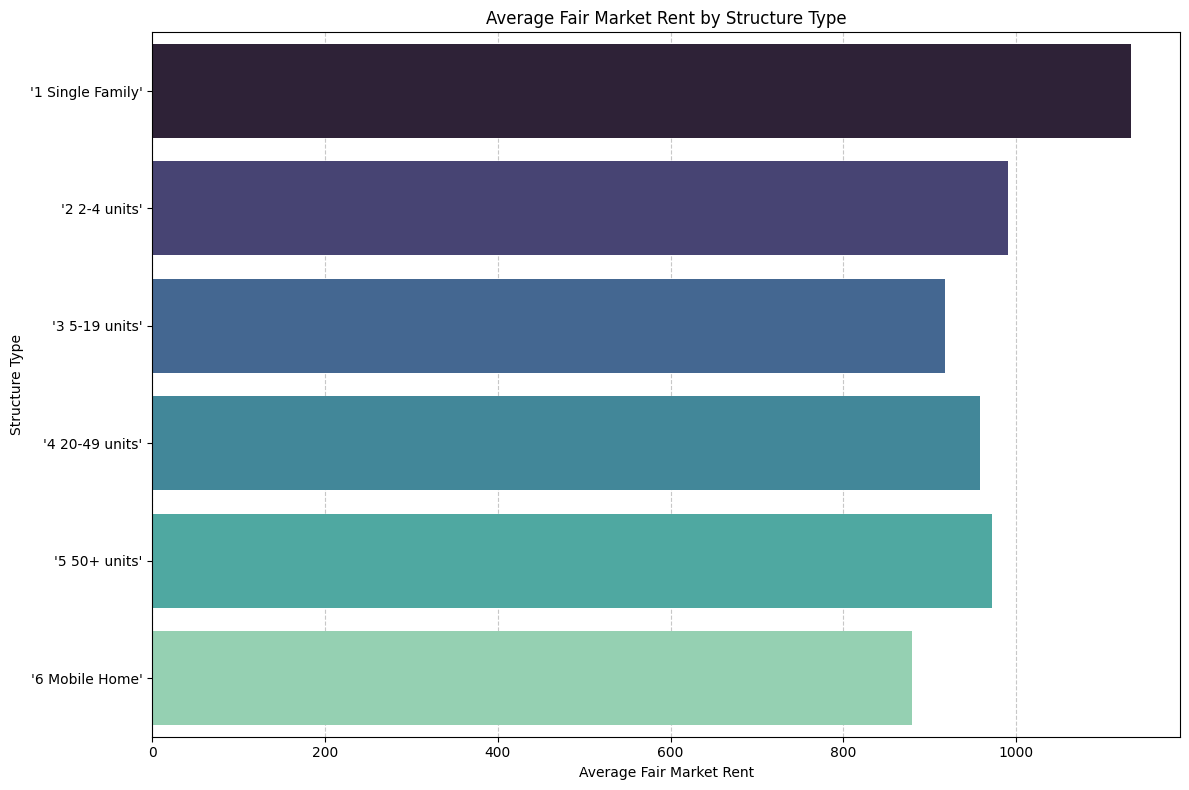

In [ ]:
# Create subplots with shared y-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the average fair market rent by structure type (horizontal bar plot)
sns.barplot(x='avg(FMR)', y='FMTSTRUCTURETYPE', data=avg_fmr_pandas, hue='FMTSTRUCTURETYPE', palette='mako', ax=ax)
ax.set_axisbelow(True)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.title("Average Fair Market Rent by Structure Type")
plt.xlabel("Average Fair Market Rent")
plt.ylabel("Structure Type")
plt.tight_layout()

#plt.savefig("q4_2.png")
plt.show()

**What's the cost burden for different types of housing structures? Do certain types of structures tend to have higher cost burdens, and are they more likely to be under financial strain?**

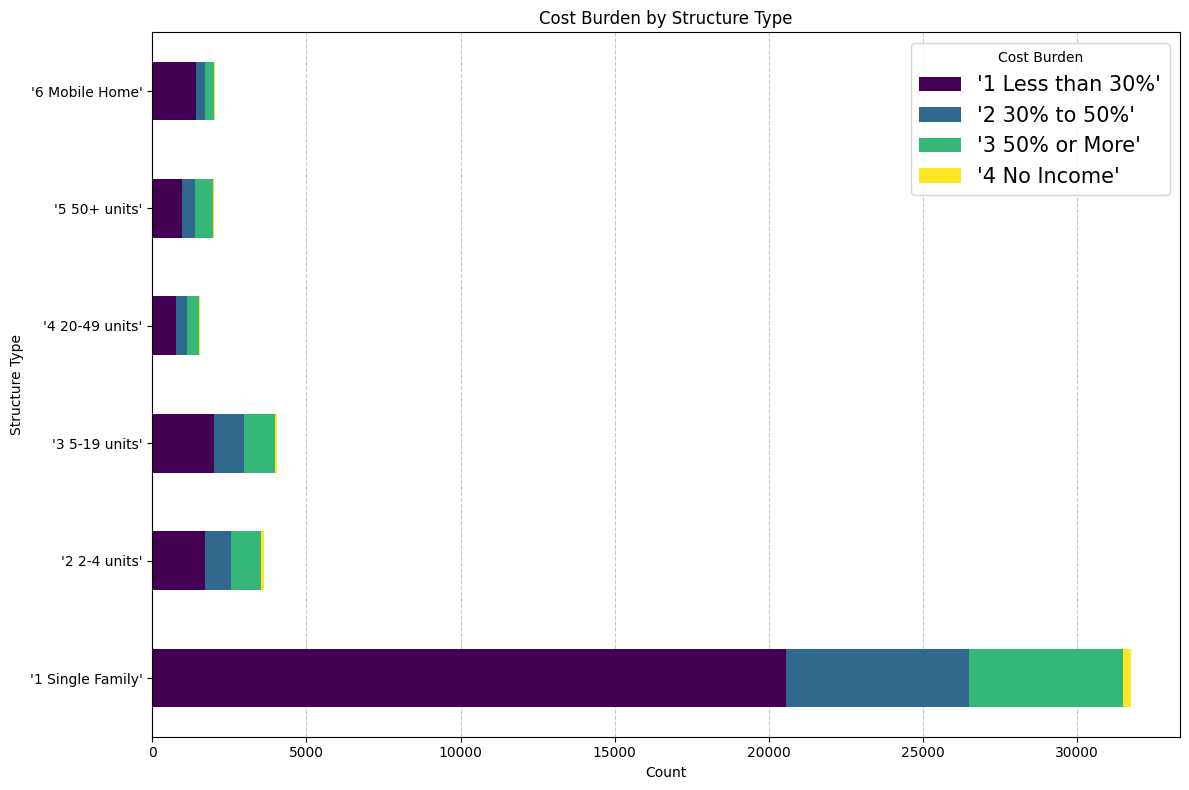

In [ ]:
# Remove rows with incomprehensible values
q5 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))
q5 = q5.filter(~col('FMTBURDEN').contains('.'))

# Group by 'FMTSTRUCTURETYPE' and 'FMTBURDEN' and count the occurrences
burden_counts = q5.groupBy("FMTSTRUCTURETYPE", "FMTBURDEN").count()

# Convert to Pandas for plotting
burden_counts_pandas = burden_counts.toPandas()

# Pivot the data to have 'FMTSTRUCTURETYPE' as the index and 'FMTBURDEN' as columns
burden_pivot = burden_counts_pandas.pivot(index='FMTSTRUCTURETYPE', columns='FMTBURDEN', values='count')

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
burden_pivot.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_axisbelow(True)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

plt.title("Cost Burden by Structure Type")
plt.xlabel("Count")
plt.ylabel("Structure Type")
plt.legend(title="Cost Burden", loc='upper right', fontsize = 15)
plt.tight_layout()

#plt.savefig("q5.png")
plt.show()

**How do average household & additional costs vary for different housing structure types?**

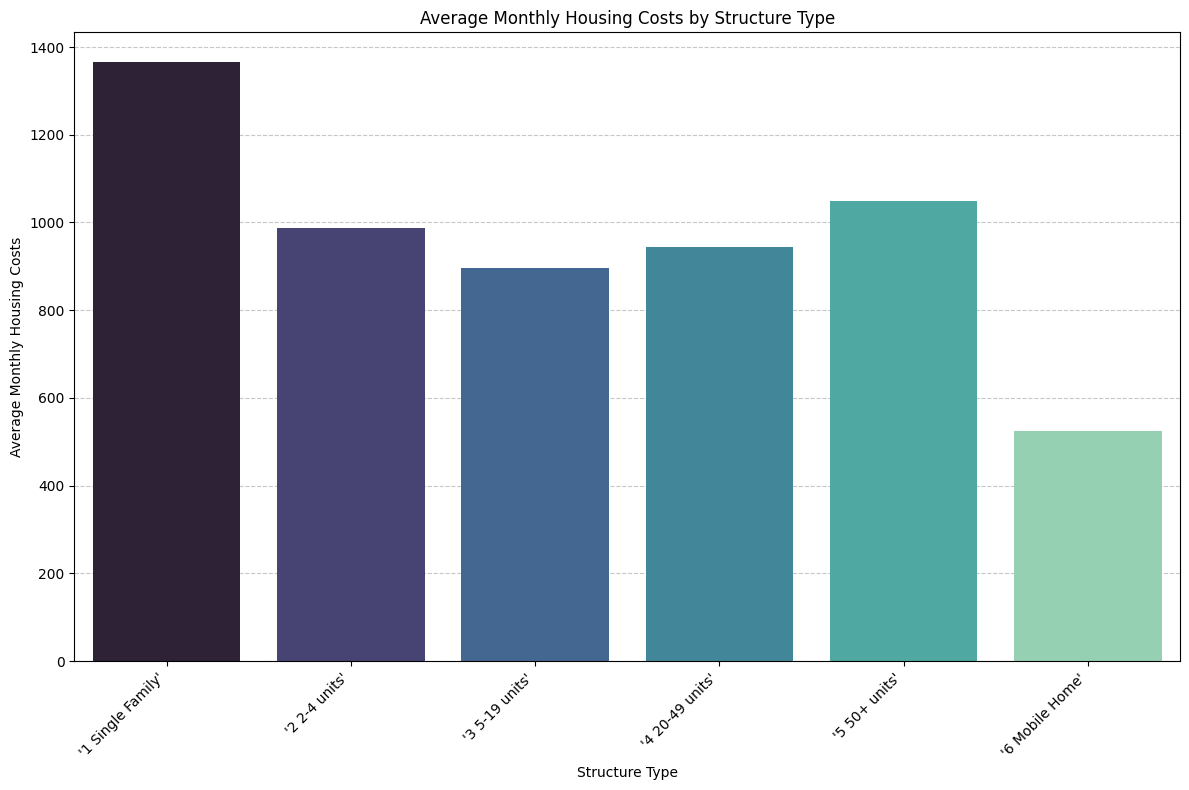

In [ ]:
# Remove rows with incomprehensible values
q6 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))
q6 = q6.filter(~col('ZSMHC').contains(-6))

# Group by 'FMTSTRUCTURETYPE' and calculate the average costs
avg_costs = q6.groupBy("FMTSTRUCTURETYPE").agg({'OTHERCOST': 'mean', 'ZSMHC': 'mean'}).orderBy(asc('FMTSTRUCTURETYPE'))

# Convert to Pandas for plotting
avg_costs_pandas = avg_costs.toPandas()

# Plot the average monthly housing costs by structure type
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='FMTSTRUCTURETYPE', y='avg(ZSMHC)', hue='FMTSTRUCTURETYPE', data=avg_costs_pandas, palette='mako', legend=False)
ax2.set_axisbelow(True)  # Ensure that grid lines are drawn below the bars
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add y-axis grid lines
plt.title("Average Monthly Housing Costs by Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Average Monthly Housing Costs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plt.savefig("q6_1.png")
plt.show()

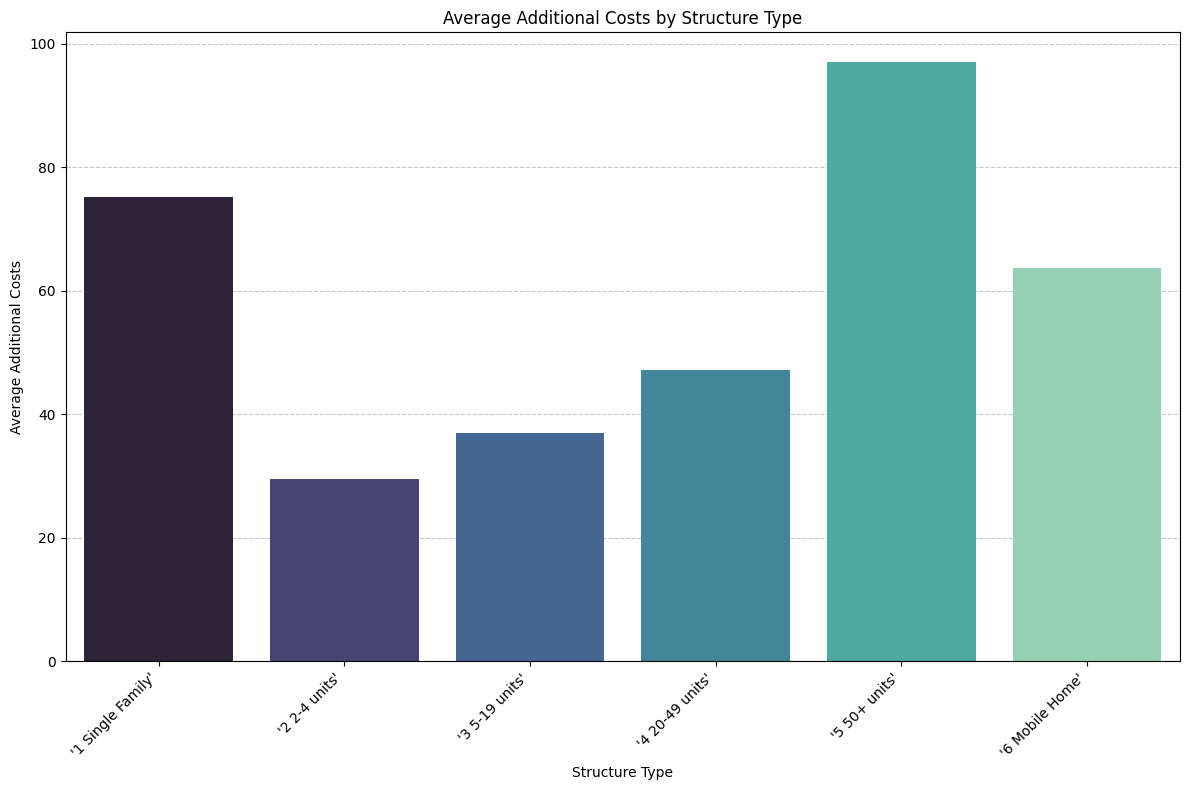

In [ ]:
# Plot the average additional costs by structure type
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='FMTSTRUCTURETYPE', y='avg(OTHERCOST)', hue='FMTSTRUCTURETYPE', data=avg_costs_pandas, palette='mako', legend=False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.title("Average Additional Costs by Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Average Additional Costs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plt.savefig("q6_2.png")
plt.show()

**How does the distribution of assisted housing compare between different structure types? Are specific structure types more likely to receive assistance?**

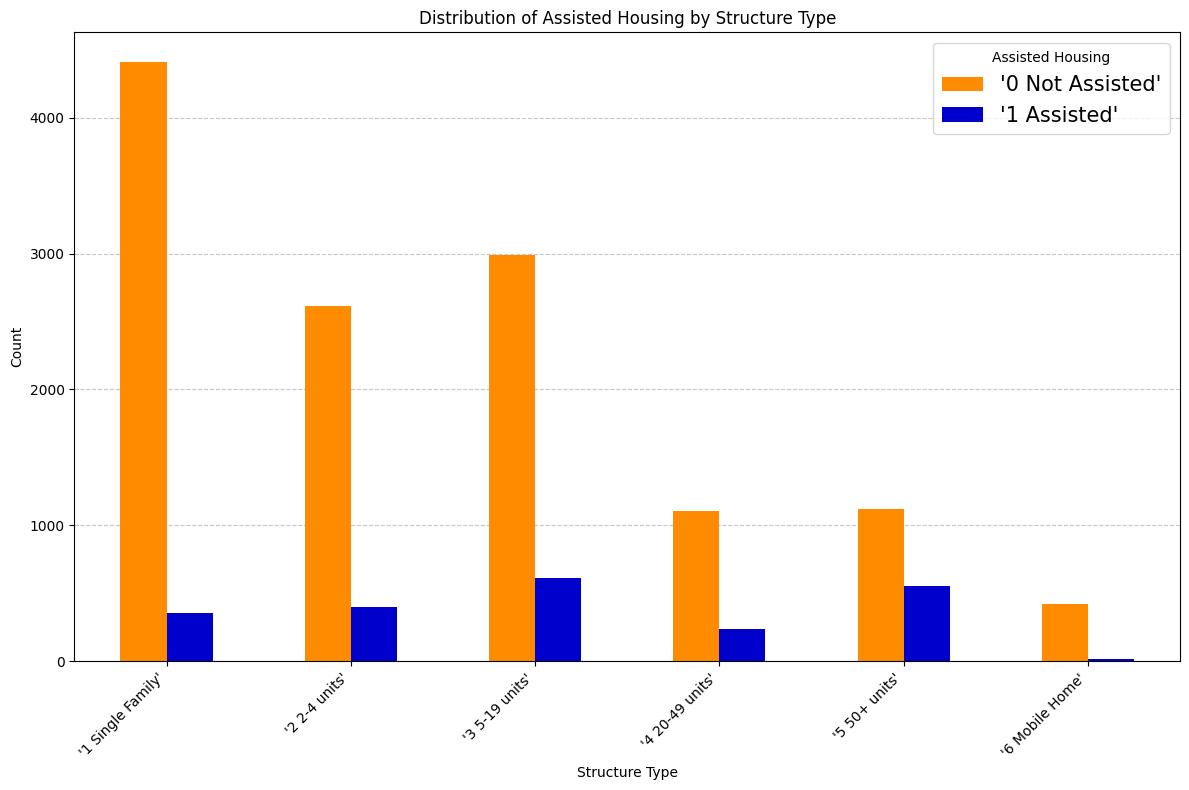

In [ ]:
# Remove rows with incomprehensible values
q7 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))
q7 = q7.filter(~col('FMTASSISTED').contains('.'))

# Group by 'FMTSTRUCTURETYPE' and 'FMTASSISTED' and count the occurrences
assisted_counts = q7.groupBy("FMTSTRUCTURETYPE", "FMTASSISTED").count()

# Convert to Pandas for plotting
assisted_counts_pandas = assisted_counts.toPandas()

# Pivot the data to have 'FMTSTRUCTURETYPE' as the index and 'FMTASSISTED' as columns
assisted_pivot = assisted_counts_pandas.pivot(index='FMTSTRUCTURETYPE', columns='FMTASSISTED', values='count')

# Create subplots with shared x-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar plot
assisted_pivot.plot(kind='bar', stacked=False, color=['darkorange', 'mediumblue'], ax=ax)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.title("Distribution of Assisted Housing by Structure Type")
plt.xlabel("Structure Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Assisted Housing", loc='upper right', fontsize=15)
plt.tight_layout()

#plt.savefig("q7.png")
plt.show()

**How does the difference in Cost relative to Median Income vary among the different housing structure types?**



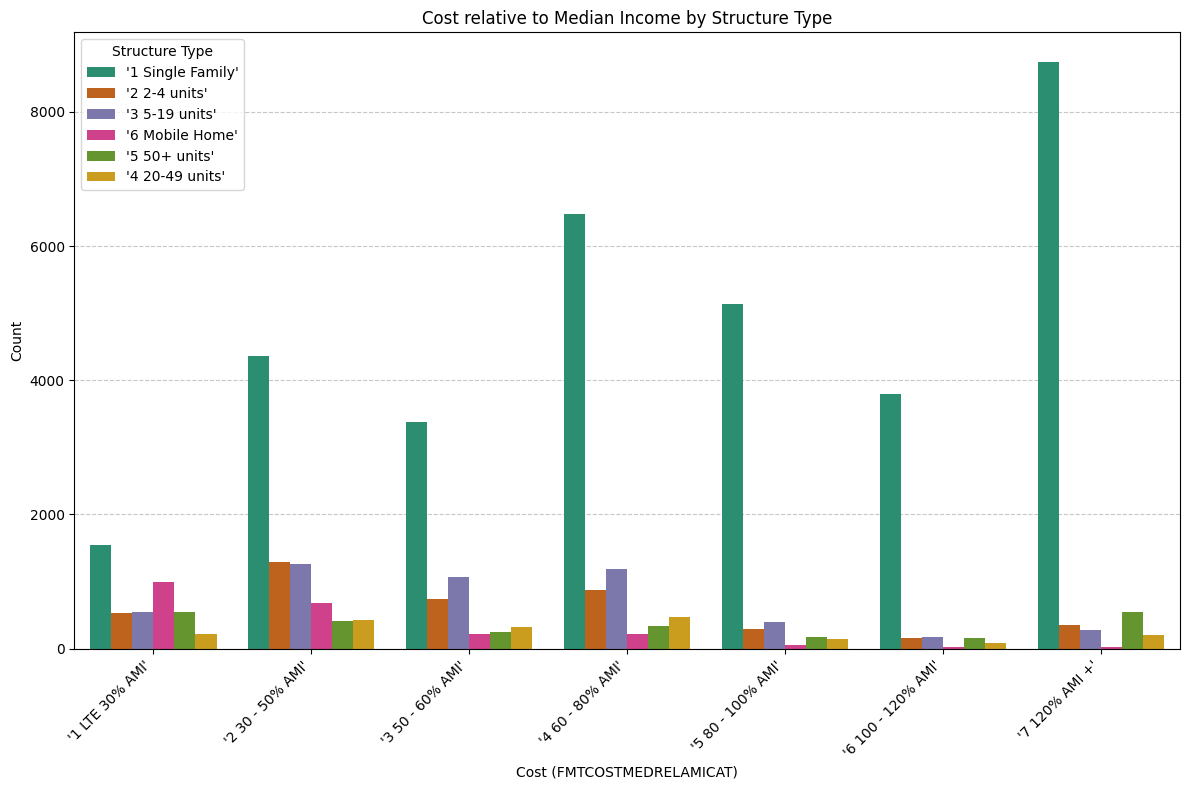

In [ ]:
# Remove rows with incomprehensible values
q8 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Ensure the column names are case-sensitive
q8 = q8.selectExpr("FMTSTRUCTURETYPE", "FMTCOSTMEDRELAMICAT").orderBy(asc('FMTCOSTMEDRELAMICAT'))

# Convert to Pandas for plotting
q8_pandas = q8.toPandas()

# Create subplots with shared x-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the count plot
sns.countplot(x='FMTCOSTMEDRELAMICAT', hue='FMTSTRUCTURETYPE', data=q8_pandas, palette='Dark2', ax=ax)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.title("Cost relative to Median Income by Structure Type")
plt.xlabel("Cost (FMTCOSTMEDRELAMICAT)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Structure Type")
plt.tight_layout()

#plt.savefig("q8.png")
plt.show()

**How is the distribution of structure types changing over the years in terms of construction?**

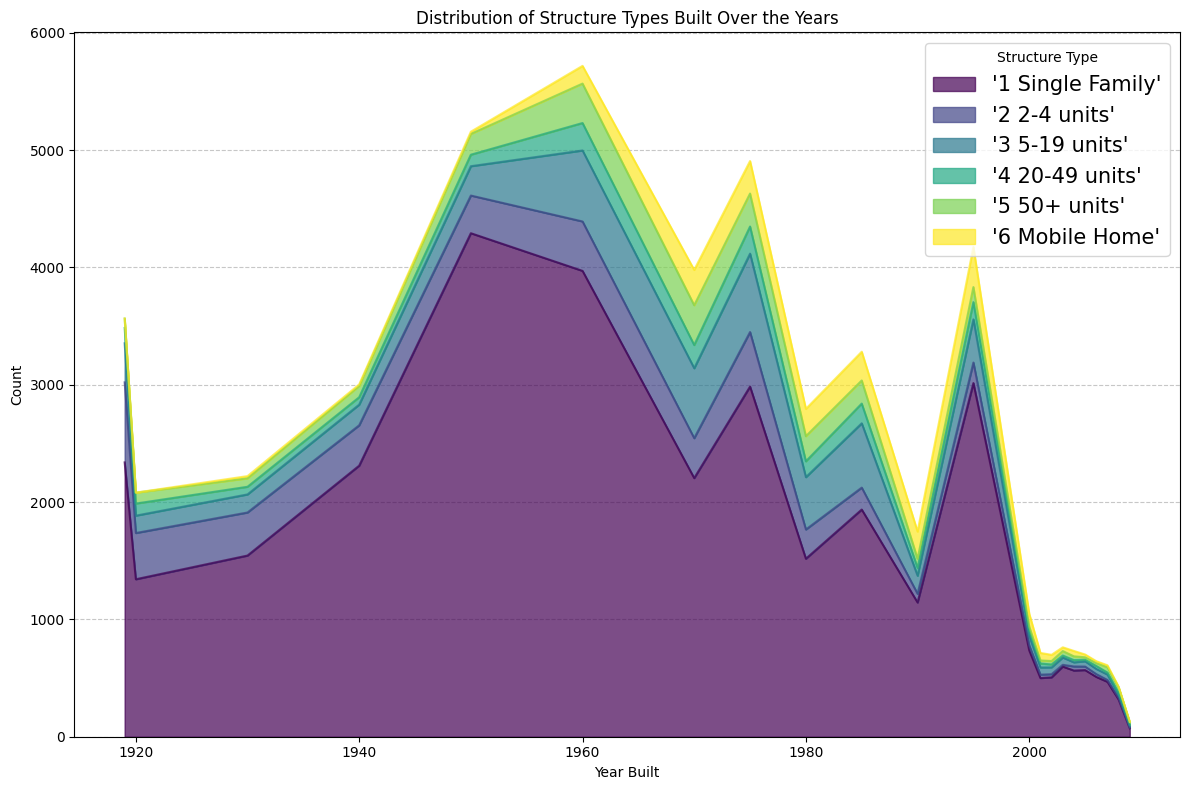

In [ ]:
# Remove rows with incomprehensible values
q9 = data.filter(~col('FMTSTRUCTURETYPE').contains('.'))

# Group by 'BUILT' and 'FMTSTRUCTURETYPE' and count the occurrences
structure_type_counts = q9.groupBy("BUILT", "FMTSTRUCTURETYPE").count()

# Convert to Pandas for plotting
structure_type_counts_pandas = structure_type_counts.toPandas()

# Pivot the data to have 'BUILT' as the index and 'FMTSTRUCTURETYPE' as columns
structure_type_pivot = structure_type_counts_pandas.pivot(index='BUILT', columns='FMTSTRUCTURETYPE', values='count')

# Create subplots with shared x-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the stacked area plot for better visualization
structure_type_pivot.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True, ax=ax)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.title("Distribution of Structure Types Built Over the Years")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.legend(title="Structure Type", loc='upper right', fontsize=15)
plt.tight_layout()

#plt.savefig("q9.png")
plt.show()